# Investigation of Loan Dataset

## Investigation Overview

In this investigation, I wanted to look at the characteristics of loans in relation to loan amounts. The main focus was on Borrower APR, listing categories, income range.

## Dataset Overview

The data contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_copy = pd.read_csv('loan_copy.csv', sep=',', encoding='latin-1', error_bad_lines=False, index_col=False, dtype='unicode')

## Data Wrangling

In [3]:
# convert ProsperRating and IncomeRange into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                   'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_copy[var] = loan_copy[var].astype(ordered_var)

In [4]:
# convert LoanStatus and ListingCategory into categorical types
var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'PastDue'],
            'ListingCategory': ['Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']}

for var in var_dict:
    cat_var = pd.api.types.CategoricalDtype(ordered = False,
                                                categories = var_dict[var])
    loan_copy[var] = loan_copy[var].astype(cat_var)

In [5]:
# change data type of 'LoanOriginalAmount' to int
loan_copy.LoanOriginalAmount = loan_copy.LoanOriginalAmount.astype(int)

In [6]:
# change data type of 'BorrowerAPR' to float
loan_copy.BorrowerAPR = loan_copy.BorrowerAPR.astype(float)

In [7]:
# change data type of 'EstimatedEffectiveYield' to float
loan_copy.EstimatedEffectiveYield = loan_copy.EstimatedEffectiveYield.astype(float)

In [8]:
# change data type of 'BorrowerRate' to float
loan_copy.BorrowerRate = loan_copy.BorrowerRate.astype(float)

In [9]:
# change data type of 'MonthlyLoanPayment' to float
loan_copy.MonthlyLoanPayment = loan_copy.MonthlyLoanPayment.astype(float)

## Distribution of Loan Amounts

Loan amount in the dataset take on a very large range of values, from about 1000 USD at the lowest, to about 35,000 USD at the highest. Plotted histogram takes a multimodal shape with high peaks at 5,000, 10,000, 15,000 USD. The most frequent loan amount is 4,000 USD.

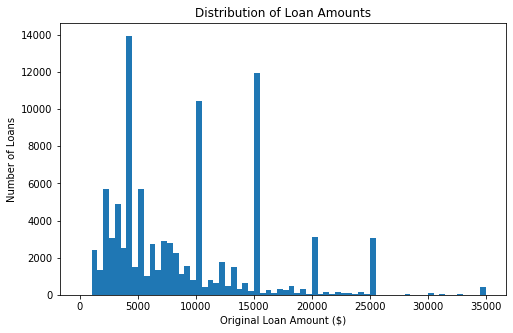

In [10]:
# start with a standard-scaled plot of Original loan amounts
binsize = 500
bins = np.arange(0, loan_copy['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_copy, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan Amounts')
plt.show()

## Distribution of Loan Amounts Compared to Income Ranges

People in the income range 25k-75k USD take the highest number of loans, which are generally in the 4,000 and 15,000 USD range of loan amounts. People in the 100k USD+ range take mostly loans from  25,000 USD and up.

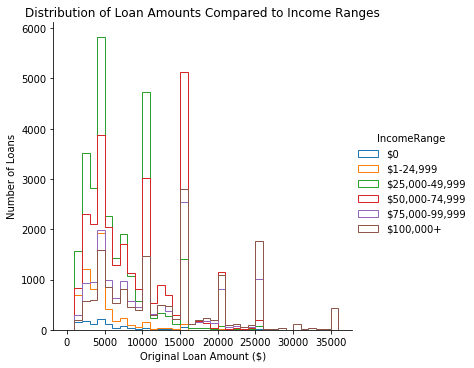

In [11]:
# Loan amount vs. IncomeRange
bin_width = 1000 ; bin_edges = np.arange(-3, loan_copy['LoanOriginalAmount'].max()+bin_width, bin_width)
g = sb.FacetGrid(data = loan_copy, hue = 'IncomeRange', size = 5)
g.map(plt.hist, "LoanOriginalAmount", bins = bin_edges, histtype = 'step') 
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan Amounts Compared to Income Ranges')
g.add_legend();

## Loan Amount vs. Loan Categories, Occupation

Regarding loan categories vs loan amount, the debt consolidation and home improvement has some outliers which result in the highest loan amount. If we disregard these outliers, Business, Auto, Engagement ring and Medical/dental spendings stand out. Professionals, teachers and IT people take the highest amount of loans.

<Figure size 1080x1080 with 0 Axes>

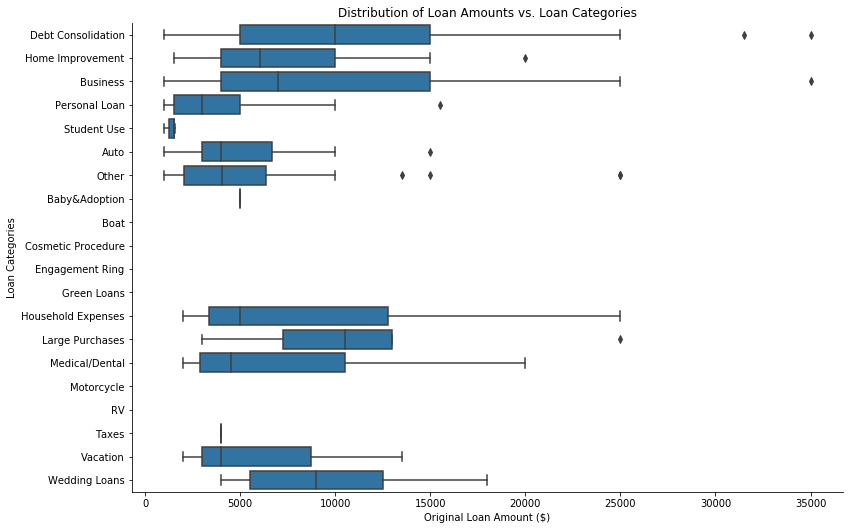

In [12]:
# plot matrix of LoanOriginalAmount categorical features.
samples = np.random.choice(loan_copy.shape[0], 500, replace = False)
loan_copy_samp = loan_copy.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = loan_copy_samp, x_vars = ['LoanOriginalAmount'], y_vars = ['ListingCategory'],
                size = 7, aspect = 1.5)
g.map(boxgrid)
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Loan Categories')
plt.title('Distribution of Loan Amounts vs. Loan Categories')
plt.show();

<Figure size 1080x1080 with 0 Axes>

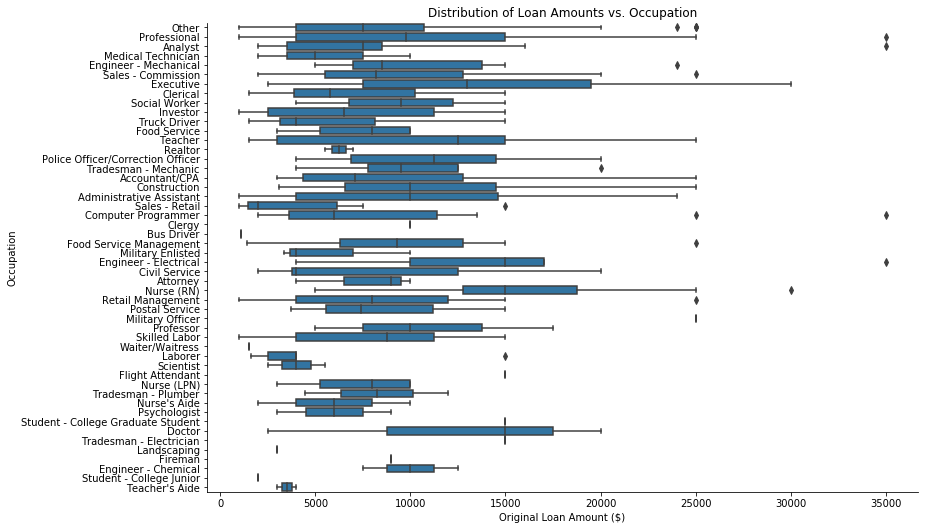

In [13]:
# plot matrix of LoanOriginalAmount categorical features.
samples = np.random.choice(loan_copy.shape[0], 500, replace = False)
loan_copy_samp = loan_copy.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = loan_copy_samp, x_vars = ['LoanOriginalAmount'], y_vars = ['Occupation'],
                size = 7, aspect = 1.5)
g.map(boxgrid)
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Occupation')
plt.title('Distribution of Loan Amounts vs. Occupation')
plt.show();

## Income Range vs. Monthly Loan Payment and Borrower APR

Checking the heat map of Income Range vs. Monthly LoanPayment and BorrowerAPR, it became obvious that people with smaller income (under 50k USD) range and small monthly payment has the highest borrower APR value which is 0.35%. People with larger income range (above 50k USD) will have almost the half of the borrower APR (around 0.2-0.25%) for slightly bigger monthly payments.
It can also happen that the Borrower APR can diverge to 0%.

In [14]:
# select loan under monthly payment of 1500 USD
loan_flag = (loan_copy['MonthlyLoanPayment'] > 0) &(loan_copy['MonthlyLoanPayment'] <= 1500)
loan_1500 = loan_copy.loc[loan_flag,:]

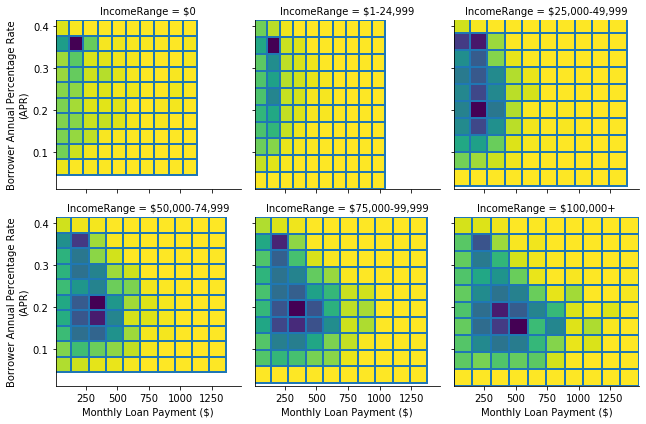

In [15]:
#heat map of IncomeRange vs. MonthlyLoanPayment and BorrowerAPR narrowed to 0-1,500 USD monthly payment range
g = sb.FacetGrid(data = loan_1500, col = 'IncomeRange', col_wrap = 3, size = 3,
                 xlim = [0, 1500])
g.map(plt.hist2d, 'MonthlyLoanPayment', 'BorrowerAPR', cmap = 'viridis_r')
g.set_xlabels('Monthly Loan Payment ($)')
g.set_ylabels('Borrower Annual Percentage Rate\n(APR)')
plt.show()

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle